## ROC Plot for MY-BENCHMARK: HMMER vs MMseqs vs MMseqs+fb-pruner

## MY-BENCHMARK Dataset

In [3]:
### Imports ###
from __future__ import print_function
import sys
import os
import psutil
import math
import numpy as np
import pandas as pd
import cv2 as cv
from PIL import Image
from IPython.display import display
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import statsmodels.api as sm
import statistics as stats

In [4]:
### MatPlotLib settings ###

# number or rows/columns to display
pd.options.display.max_rows = 40
pd.options.display.max_columns = 20

# resolution of output
matplotlib.rcParams['figure.dpi'] = 300

font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 6 }

matplotlib.rc('font', **font)

database = "my-benchmark"
version = "002"
# params = "12.16.5."
params = ""

In [5]:
### Root Directory ###
path_to_db = "data/{}/".format(database)

In [6]:
### Index Filepaths ###
target_index_fname = "{}/target.idx".format(path_to_db)
query_index_fname = "{}/query.idx".format(path_to_db)

In [7]:
### Filepaths ###
hmmer_fname            = "{}/hmmer_n1.{}.{}.tf".format(path_to_db, database, version)
hmmer_nonull_fname     = "{}/hmmer_n1.{}.{}.tf".format(path_to_db, database, "nonull2.004")

mmseqs_k95_fname       = "{}/mmseqs_n1.{}.k95.{}.tf".format(path_to_db, database, "004")
mmseqs_k80_fname       = "{}/mmseqs_n1.{}.k80.{}.tf".format(path_to_db, database, "004")
mmseqs_k75_fname       = "{}/mmseqs_n1.{}.k75.{}.tf".format(path_to_db, database, "004")

mmseqs_k95_hmm_fname   = "{}/mmseqs_n1_hmm.{}.k95.{}.tf".format(path_to_db, database, "008")
# mmseqs_k80_hmm_fname   = "{}/mmseqs_n1_hmm.{}.k80.{}.tf".format(path_to_db, database, "008")
mmseqs_k80_hmm_fname   = "{}/mmseqs.mybench.tf".format(path_to_db)
mmseqs_k75_hmm_fname   = "{}/mmseqs_n1_hmm.{}.k75.{}.tf".format(path_to_db, database, "008")

fbpruner_k95_cut_fname = "{}/mmseqs_plus.{}.k95.cut.{}{}.tf".format(path_to_db, database, params, version)
fbpruner_k95_all_fname = "{}/mmseqs_plus.{}.k95.all.{}{}.tf".format(path_to_db, database, params, "004")
fbpruner_k80_cut_fname = "{}/mmseqs_plus.{}.k80.cut.{}{}.tf".format(path_to_db, database, params, version)
fbpruner_k80_all_fname = "{}/mmseqs_plus.{}.k80.all.{}{}.tf".format(path_to_db, database, params, "004")
fbpruner_k75_cut_fname = "{}/mmseqs_plus.{}.k75.cut.{}{}.tf".format(path_to_db, database, params, version)
fbpruner_k75_all_fname = "{}/mmseqs_plus.{}.k75.all.{}{}.tf".format(path_to_db, database, params, "004")

mmore_fname            = "{}/mmore.mybench.tf".format(path_to_db)
mmore_full_fname       = "{}/mmore.mybench.full.tf".format(path_to_db)
mmore_filter_fname     = "{}/mmore.mybench.filter.tf".format(path_to_db)
mmore_old_fname        = "{}/mmoreseqs.mybench.old.tf".format(path_to_db)
mmore_full_old_fname   = "{}/mmore.mybench.full.old.tf".format(path_to_db)
mmore_new_fname        = "{}/mmoreseqs.mybench.new.tf".format(path_to_db)
mmore_new2_fname       = "{}/mmore.mybench.new2.tf".format(path_to_db)
mmore_nobias_new_fname = "{}/mmoreseqs.mybench.nobias.new.tf".format(path_to_db)


In [8]:
### Counts ###
# Total Queries and Targets
total_target       =   2017088
total_query        =      3003
total_target_real  =     17088 
total_target_decoy =   2000000
# Total True Positives and Negatives
total_res = 6057315264
total_TP  =      17088
total_TN  = 6006000000
unknown   =   51298176
TP_to_TN  =   2.85e-06

In [9]:
### Runtimes ###
# hmmer
hmmer_times = {}
hmmer_times["search"]    = 83035.67
hmmer_times["total"]     = hmmer_times["search"]

# mmseqs
mmseqs_times = {}
mmseqs_build         =  1859.31
# max-seqs=4000
# mmseqs_times["k95"]  =  4389.68 + mmseqs_build
# mmseqs_times["k80"]  = 11850.44 + mmseqs_build
# mmseqs_times["k75"]  = 25155.24 + mmseqs_build
# max-seqs=40000
mmseqs_times["k95"]  = 12055.589 + mmseqs_build
mmseqs_times["k80"]  = 19274.638 + mmseqs_build
mmseqs_times["k75"]  = 30104.800 + mmseqs_build

# fbpruner
fbpruner_times = {}
fbpruner_times["index"]  = 7.0
fbpruner_times["build"]  = 0.0
fbpruner_build              = fbpruner_times["index"] + fbpruner_times["build"]
# max-seqs=4000
fbpruner_times["k95-cut"]   =   691.31 + fbpruner_build + mmseqs_times["k95"]
fbpruner_times["k95-all"]   = 12498.40 + fbpruner_build + mmseqs_times["k95"]
fbpruner_times["k80-cut"]   =   628.16 + fbpruner_build + mmseqs_times["k80"]
fbpruner_times["k80-all"]   = 15418.69 + fbpruner_build + mmseqs_times["k80"]
fbpruner_times["k75-cut"]   =   494.80 + fbpruner_build + mmseqs_times["k75"]
fbpruner_times["k75-all"]   = 12627.01 + fbpruner_build + mmseqs_times["k75"]
# max-seqs=40000
# fbpruner_times["k95-cut"]   =   691.31 + fbpruner_build + mmseqs_times["k95"]
fbpruner_times["k95-all"]   = 53863.69 + fbpruner_build + mmseqs_times["k95"]
# fbpruner_times["k80-cut"]   =   628.16 + fbpruner_build + mmseqs_times["k80"]
fbpruner_times["k80-all"]   = 55216.84 + fbpruner_build + mmseqs_times["k80"]
# fbpruner_times["k75-cut"]   =   494.80 + fbpruner_build + mmseqs_times["k75"]
fbpruner_times["k75-all"]   = 53167.76 + fbpruner_build + mmseqs_times["k75"]

# mmore
mmoreseqs_mmseqs_new_times  = 59708.00
mmoreseqs_mmore_times       = 11283.7
mmoreseqs_mmore_full_times  = 55348.1
mmoreseqs_mmore_old_times   = 45806.86

# load data

In [10]:
datas = []

# set header format
tf_dformat = {
    "target_name": "str",
    "query_name": "str",
    "eval": "float",
    "truth": "str",
    "tot_T": "int",
    "tot_F": "int",
    "tot_?": "int"
}
tf_header = tf_dformat.keys()

# load data
usecols = [0,1,2,3,4,5]
skiprows = None
sep = " "
names = tf_header

In [11]:
hmmer_data = pd.read_csv( hmmer_fname, sep=sep, header=None, skiprows=skiprows, usecols=usecols, names=names, index_col=False, verbose=False )
datas.append(hmmer_data)

hmmer_nonull_data = pd.read_csv( hmmer_nonull_fname, sep=sep, header=None, skiprows=skiprows, usecols=usecols, names=names, index_col=False, verbose=False )
datas.append(hmmer_nonull_data)


In [12]:
mmseqs_k75_data = pd.read_csv( mmseqs_k75_fname, sep=sep, header=None, skiprows=skiprows, usecols=usecols, names=names, index_col=False, verbose=False )
datas.append(mmseqs_k75_data)
mmseqs_k75_data

mmseqs_k80_data = pd.read_csv( mmseqs_k80_fname, sep=sep, header=None, skiprows=skiprows, usecols=usecols, names=names, index_col=False, verbose=False )
datas.append(mmseqs_k80_data)
mmseqs_k80_data

mmseqs_k95_data = pd.read_csv( mmseqs_k95_fname, sep=sep, header=None, skiprows=skiprows, usecols=usecols, names=names, index_col=False, verbose=False )
datas.append(mmseqs_k95_data)
mmseqs_k95_data

,target_name,query_name,eval,truth,tot_T,tot_F
0,Lig_chan,Lig_chan/9067/4-266/294-594,1.692000e-35,T,88,0
1,AA_permease_2,AA_permease_2/520/28-496/497-1019,8.393000e-30,T,179,0
2,SBP_bac_5,SBP_bac_5/14081/375-818/905-1272,8.640000e-26,T,274,0
3,DUF945,DUF945/5940/278-704/973-1412,3.494000e-23,T,367,0
4,DUF885,DUF885/5890/26-552/904-1410,2.967000e-21,T,461,0
...,...,...,...,...,...,...
31951,Sema,decoy501998,9.995000e+03,F,8911,3150769
31952,Sema,decoy827900,9.995000e+03,F,8911,3150869
31953,Prismane,decoy1267855,9.998000e+03,F,8911,3150966
31954,Prismane,decoy1814836,9.998000e+03,F,8911,3151066


In [13]:
mmseqs_k75_hmm_data = pd.read_csv( mmseqs_k75_hmm_fname, sep=sep, header=None, skiprows=skiprows, usecols=usecols, names=names, index_col=False, verbose=False )
datas.append(mmseqs_k75_hmm_data)
mmseqs_k75_hmm_data

mmseqs_k80_hmm_data = pd.read_csv( mmseqs_k80_hmm_fname, sep=sep, header=None, skiprows=skiprows, usecols=usecols, names=names, index_col=False, verbose=False )
datas.append(mmseqs_k80_hmm_data)
mmseqs_k80_hmm_data

mmseqs_k95_hmm_data = pd.read_csv( mmseqs_k95_hmm_fname, sep=sep, header=None, skiprows=skiprows, usecols=usecols, names=names, index_col=False, verbose=False )
datas.append(mmseqs_k95_hmm_data)
mmseqs_k95_hmm_data

,target_name,query_name,eval,truth,tot_T,tot_F
0,DUF885,DUF885/5890/26-552/904-1410,2.967000e-21,T,461,0
1,Npa1,Npa1/10728/165-498/529-910,4.679000e-15,T,917,0
2,Type_ISP_C,Type_ISP_C/16250/149-490/509-881,1.446000e-11,T,1384,0
3,PepSY_TM,PepSY_TM/11582/874-1229/2079-2429,3.776000e-09,T,1861,0
4,DUF2804,DUF2804/4401/54-387/407-738,2.711000e-07,T,2329,0
...,...,...,...,...,...,...
9932,Sema,decoy1085612,9.995000e+03,F,9404,4902656
9933,Sema,decoy1630417,9.995000e+03,F,9404,4903156
9934,Sema,decoy444080,9.995000e+03,F,9404,4903656
9935,Sema,decoy99398,9.995000e+03,F,9404,4904156


In [14]:
fbpruner_k95_cut_data = pd.read_csv( fbpruner_k95_cut_fname, sep=sep, header=None, skiprows=skiprows, usecols = usecols, names=names, index_col=False, verbose=False, error_bad_lines=False )
datas.append(fbpruner_k95_cut_data)
fbpruner_k95_cut_data

fbpruner_k95_all_data = pd.read_csv( fbpruner_k95_all_fname, sep=sep, header=None, skiprows=skiprows, usecols = usecols, names=names, index_col=False, verbose=False, error_bad_lines=False )
datas.append(fbpruner_k95_all_data)
fbpruner_k95_all_data

fbpruner_k80_cut_data = pd.read_csv( fbpruner_k80_cut_fname, sep=sep, header=None, skiprows=skiprows, usecols = usecols, names=names, index_col=False, verbose=False, error_bad_lines=False )
datas.append(fbpruner_k80_cut_data)
fbpruner_k80_cut_data

fbpruner_k80_all_data = pd.read_csv( fbpruner_k80_all_fname, sep=sep, header=None, skiprows=skiprows, usecols = usecols, names=names, index_col=False, verbose=False, error_bad_lines=False )
datas.append(fbpruner_k80_all_data)
fbpruner_k80_all_data

fbpruner_k75_cut_data = pd.read_csv( fbpruner_k75_cut_fname, sep=sep, header=None, skiprows=skiprows, usecols = usecols, names=names, index_col=False, verbose=False, error_bad_lines=False )
datas.append(fbpruner_k75_cut_data)
fbpruner_k75_cut_data

fbpruner_k75_all_data = pd.read_csv( fbpruner_k75_all_fname, sep=sep, header=None, skiprows=skiprows, usecols = usecols, names=names, index_col=False, verbose=False, error_bad_lines=False )
datas.append(fbpruner_k75_all_data)
fbpruner_k75_all_data

,target_name,query_name,eval,truth,tot_T,tot_F
0,ASC,ASC/1875/3-464/475-896,0.0,T,95,0
1,Choline_transpo,Choline_transpo/2841/62-392/426-757,0.0,T,195,0
2,DUF2232,DUF2232/4267/229-510/1241-1525,0.0,T,290,0
3,FmiP_Thoc5,FmiP_Thoc5/6854/141-532/566-948,0.0,T,389,0
4,LptF_LptG,LptF_LptG/9393/50-400/408-752,0.0,T,474,0
...,...,...,...,...,...,...
40036,ZnuA,decoy1691632,2000000.0,F,9205,3951286
40037,Zona_pellucida,decoy1450772,2000000.0,F,9205,3951384
40038,Zona_pellucida,decoy431352,2000000.0,F,9205,3951484
40039,Zot,decoy1779688,2000000.0,F,9205,3951584


In [15]:
mmore_data = pd.read_csv( mmore_fname, sep=sep, header=None, skiprows=skiprows, usecols = usecols, names=names, index_col=False, verbose=False, error_bad_lines=False )
datas.append(mmore_data)
mmore_data

mmore_full_data = pd.read_csv( mmore_full_fname, sep=sep, header=None, skiprows=skiprows, usecols = usecols, names=names, index_col=False, verbose=False, error_bad_lines=False )
datas.append(mmore_full_data)
mmore_full_data

mmore_old_data = pd.read_csv( mmore_old_fname, sep=sep, header=None, skiprows=skiprows, usecols = usecols, names=names, index_col=False, verbose=False, error_bad_lines=False )
datas.append(mmore_old_data)
mmore_old_data

mmore_full_old_data = pd.read_csv( mmore_full_old_fname, sep=sep, header=None, skiprows=skiprows, usecols = usecols, names=names, index_col=False, verbose=False, error_bad_lines=False )
datas.append(mmore_full_old_data)
mmore_full_old_data

,target_name,query_name,eval,truth,tot_T,tot_F
0,ASC,ASC/1895/287-759/808-1283,0.0,T,96,0
1,Condensation,Condensation/3062/210-664/887-1321,0.0,T,196,0
2,DUF4135,DUF4135/4993/65-403/427-784,0.0,T,291,0
3,HECT,HECT/8076/11-318/364-668,0.0,T,389,0
4,Mononeg_RNA_pol,Mononeg_RNA_pol/10308/23-1072/1102-2185,0.0,T,474,0
...,...,...,...,...,...,...
20801,Spo16,decoy1799809,2000000.0,F,9907,2044019
20802,TatD_DNase,decoy1880843,2000000.0,F,9907,2044118
20803,TMEM237,decoy168907,2000000.0,F,9907,2044216
20804,UCH,decoy958785,2000000.0,F,9907,2044315


In [16]:
mmore_new_data = pd.read_csv( mmore_new_fname, sep=sep, header=None, skiprows=skiprows, usecols = usecols, names=names, index_col=False, verbose=False, error_bad_lines=False )
datas.append(mmore_new_data)
mmore_new_data

mmore_nobias_new_data = pd.read_csv( mmore_nobias_new_fname, sep=sep, header=None, skiprows=skiprows, usecols = usecols, names=names, index_col=False, verbose=False, error_bad_lines=False )
datas.append(mmore_nobias_new_data)
mmore_nobias_new_data


,target_name,query_name,eval,truth,tot_T,tot_F
0,Porin_10,Porin_10/12737/29-640/647-1237,-261.953,T,90,0
1,TonB_dep_Rec,TonB_dep_Rec/15608/196-668/728-1207,-230.379,T,185,0
2,Sugar_tr,Sugar_tr/14928/4-463/465-927,-210.683,T,283,0
3,MDM1,MDM1/9738/468-920/1004-1578,-195.035,T,382,0
4,SPX,SPX/14862/77-559/686-1049,-182.083,T,480,0
...,...,...,...,...,...,...
20801,XK-related,decoy1578844,10.679,F,9907,2044014
20802,DNase_II,decoy325884,10.835,F,9907,2044114
20803,GlcNAc_2-epim,decoy1174950,11.007,F,9907,2044214
20804,CECR6_TMEM121,decoy1306726,11.330,F,9907,2044312


In [17]:
for data in datas:
    data["roc_y"] = data["tot_T"] / total_TP
    data["roc_x"] = data["tot_F"] / total_query

In [18]:
data

,target_name,query_name,eval,truth,tot_T,tot_F,roc_y,roc_x
0,Porin_10,Porin_10/12737/29-640/647-1237,-261.953,T,90,0,0.005267,0.000000
1,TonB_dep_Rec,TonB_dep_Rec/15608/196-668/728-1207,-230.379,T,185,0,0.010826,0.000000
2,Sugar_tr,Sugar_tr/14928/4-463/465-927,-210.683,T,283,0,0.016561,0.000000
3,MDM1,MDM1/9738/468-920/1004-1578,-195.035,T,382,0,0.022355,0.000000
4,SPX,SPX/14862/77-559/686-1049,-182.083,T,480,0,0.028090,0.000000
...,...,...,...,...,...,...,...,...
20801,XK-related,decoy1578844,10.679,F,9907,2044014,0.579764,680.657343
20802,DNase_II,decoy325884,10.835,F,9907,2044114,0.579764,680.690643
20803,GlcNAc_2-epim,decoy1174950,11.007,F,9907,2044214,0.579764,680.723943
20804,CECR6_TMEM121,decoy1306726,11.330,F,9907,2044312,0.579764,680.756577


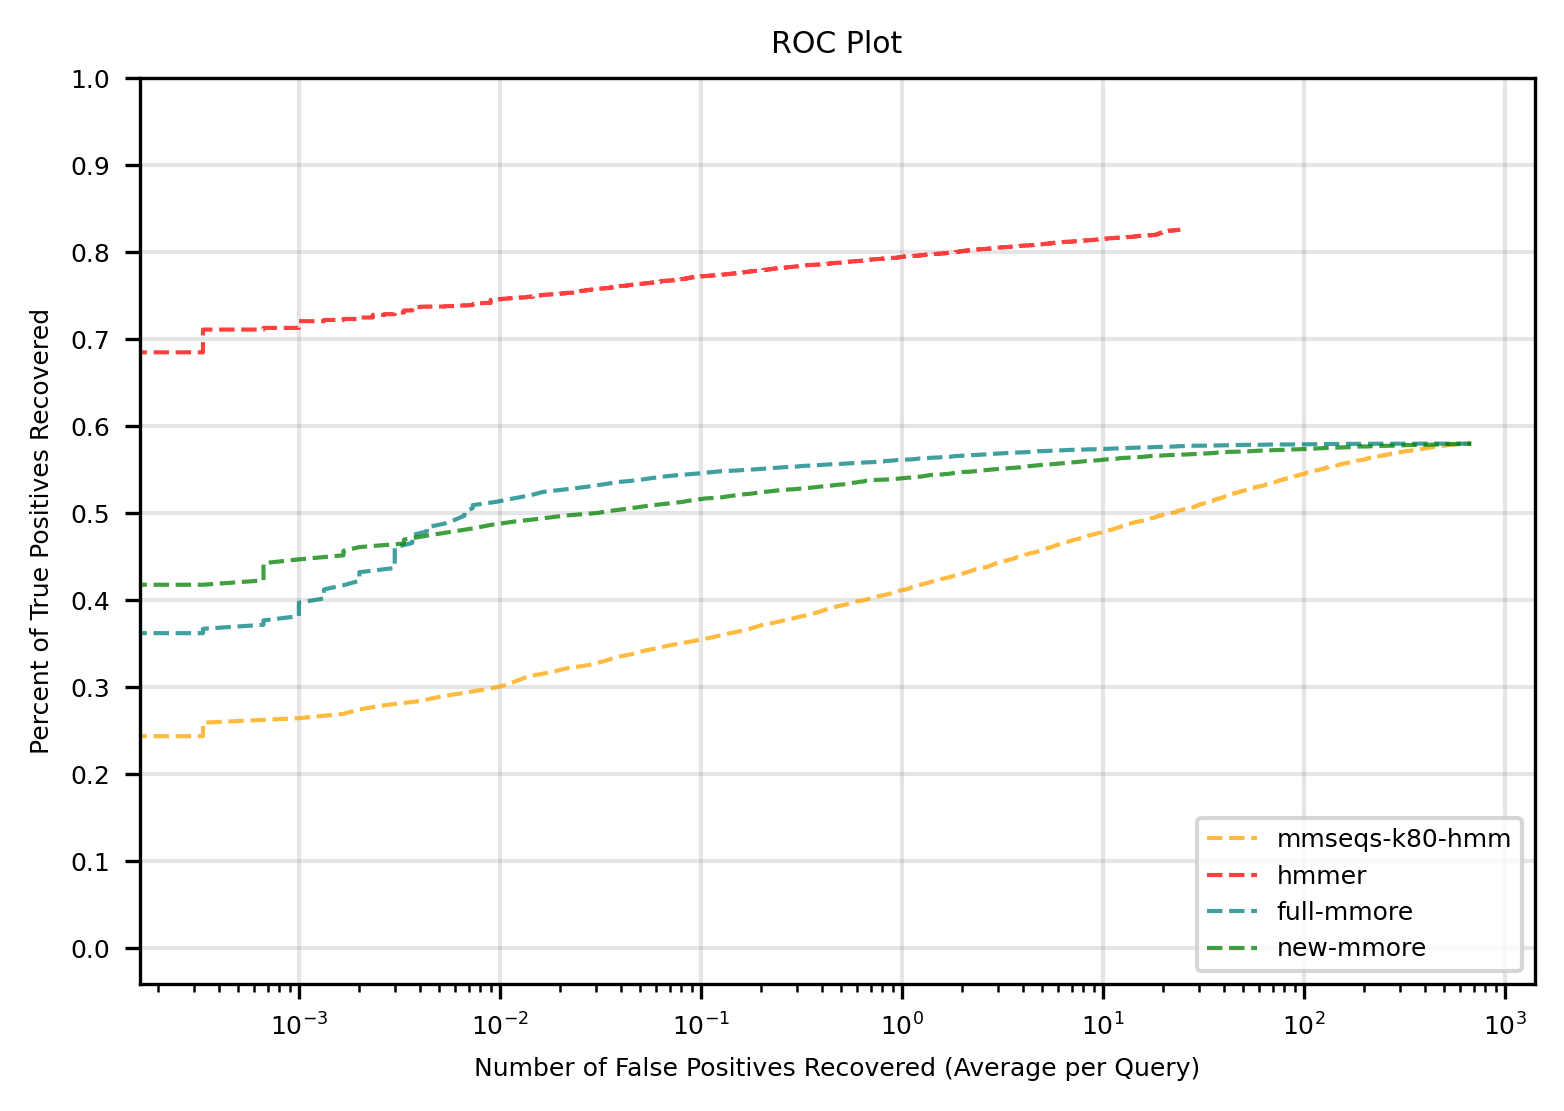

In [21]:
my_data = [  mmseqs_k80_hmm_data,  hmmer_data, mmore_full_old_data, mmore_new_data ]
colors  = [ 'orange',  'red', 'teal', 'green', 'purple', 'black' ]
labels  = [ 'mmseqs-k80-hmm', 'hmmer', 'full-mmore', 'new-mmore' ]
linewidths = [ 1.0, 1.0, 1.0, 1.0, 1.0, 1.0 ]

for x in range(len(my_data)):
    plt.plot( my_data[x]["roc_x"], my_data[x]["roc_y"], color=colors[x], label=labels[x], linestyle="--", marker=None, linewidth=linewidths[x], alpha=0.75 )

yticks = [(x*0.1) for x in range(0,11,1)]
plt.grid(color='gray', linestyle='-', linewidth=1, alpha=0.2)
plt.yticks(yticks)
    
plt.title('ROC Plot')
plt.legend(loc='lower right')
plt.ylabel('Percent of True Positives Recovered')
plt.xlabel('Number of False Positives Recovered (Average per Query)')
plt.xscale('log')
plt.savefig("visuals/mmseqs-hmmer-fbpruner-roc-plot.jpg")
plt.show()

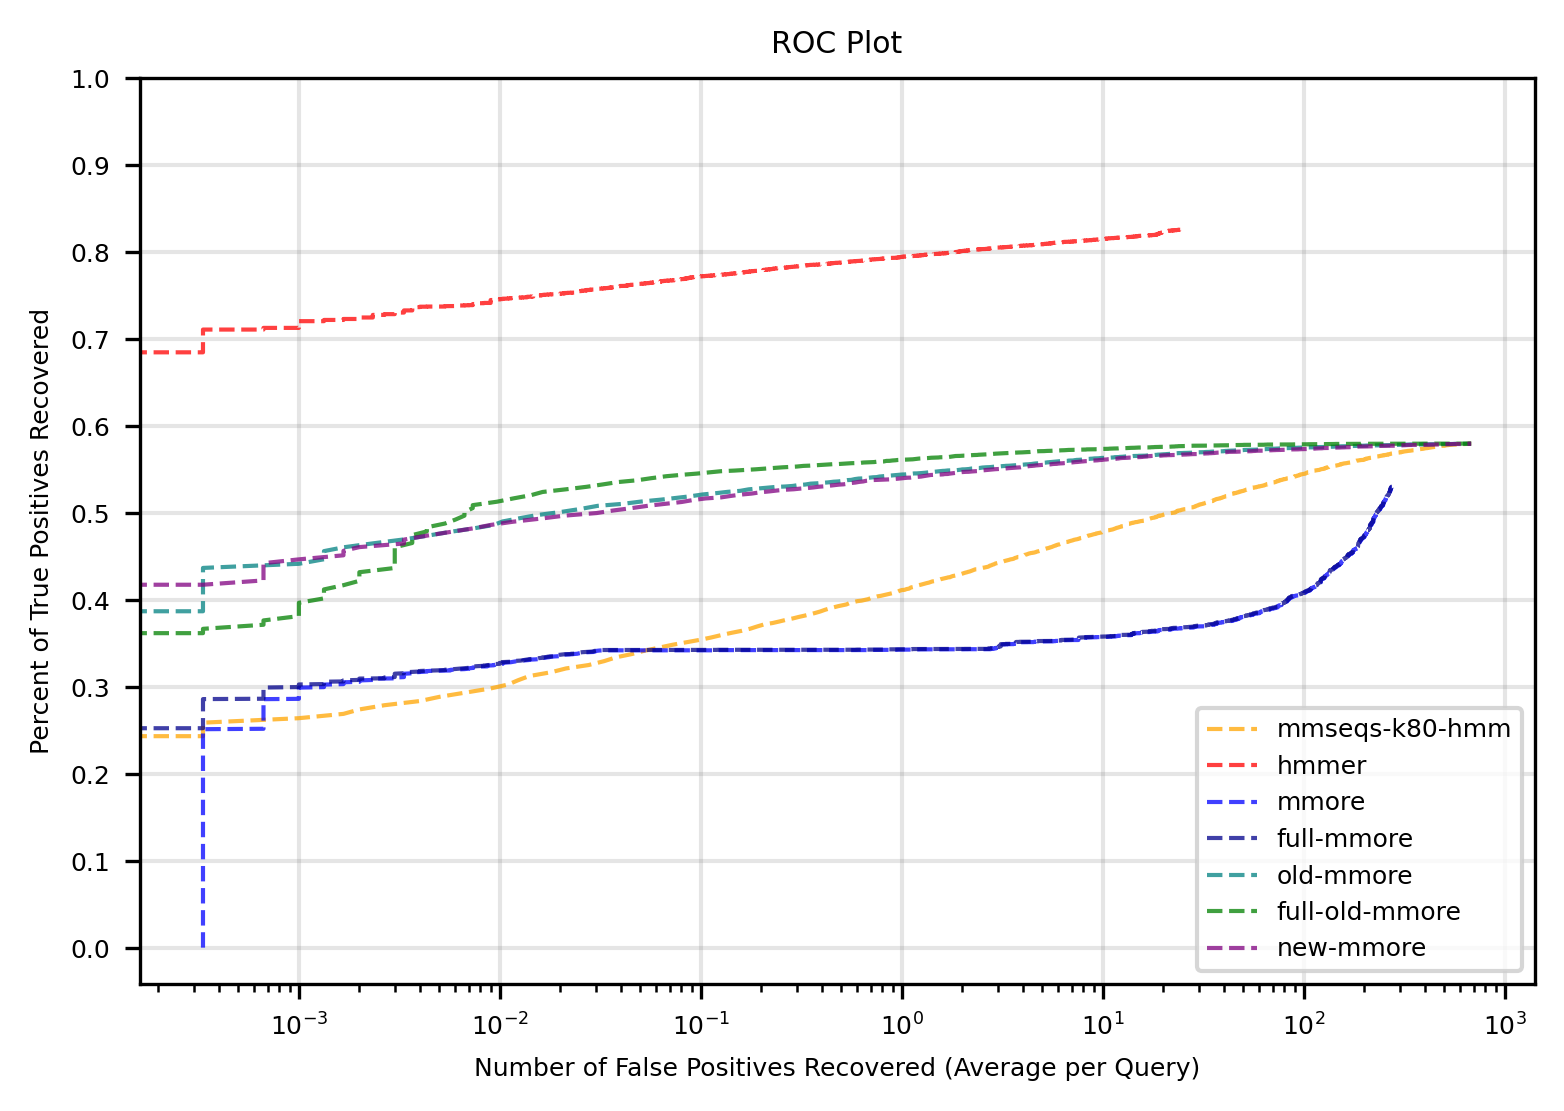

In [20]:
my_data = [  mmseqs_k80_hmm_data, hmmer_data, mmore_data, mmore_full_data, mmore_old_data, mmore_full_old_data, mmore_new_data ]
colors  = [ 'orange',  'red', 'blue', 'darkblue', 'teal', 'green', 'purple', 'black' ]
labels  = [ 'mmseqs-k80-hmm', 'hmmer', 'mmore', 'full-mmore', 'old-mmore', 'full-old-mmore', 'new-mmore', 'new-nobias-mmore' ]
linewidths = [ 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0 ]

for x in range(len(my_data)):
    plt.plot( my_data[x]["roc_x"], my_data[x]["roc_y"], color=colors[x], label=labels[x], linestyle="--", marker=None, linewidth=linewidths[x], alpha=0.75 )

yticks = [(x*0.1) for x in range(0,11,1)]
plt.grid(color='gray', linestyle='-', linewidth=1, alpha=0.2)
plt.yticks(yticks)
    
plt.title('ROC Plot')
plt.legend(loc='lower right')
plt.ylabel('Percent of True Positives Recovered')
plt.xlabel('Number of False Positives Recovered (Average per Query)')
plt.xscale('log')
plt.savefig("visuals/mmseqs-hmmer-fbpruner-roc-plot.jpg")
plt.show()

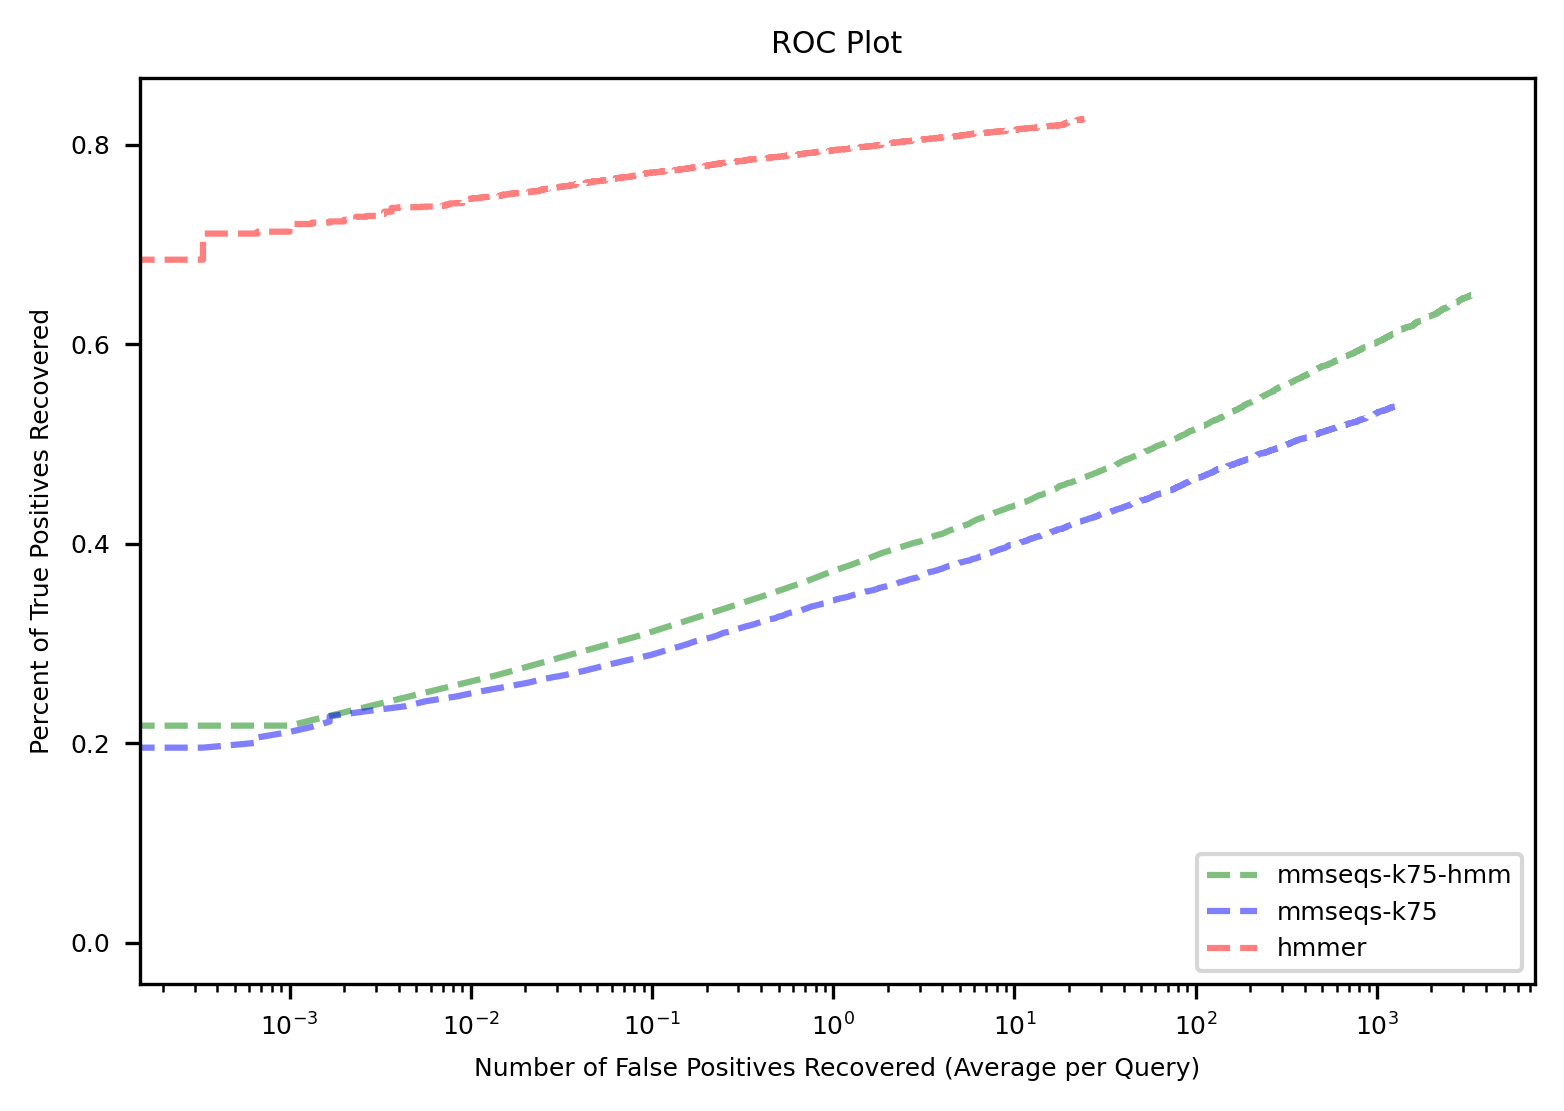

In [72]:
my_data = [ mmseqs_k75_hmm_data, mmseqs_k75_data, hmmer_data ]
colors  = [ 'green', 'blue', 'red' ]
labels  = [ 'mmseqs-k75-hmm', 'mmseqs-k75', 'hmmer' ]
linewidths = [ 1.5, 1.5, 1.5 ]

for x in range(len(my_data)):
    plt.plot( my_data[x]["roc_x"], my_data[x]["roc_y"], color=colors[x], label=labels[x], linestyle="--", marker=None, linewidth=linewidths[x], alpha=0.5 )

plt.title('ROC Plot')
plt.legend(loc='lower right')
plt.ylabel('Percent of True Positives Recovered')
plt.xlabel('Number of False Positives Recovered (Average per Query)')
plt.xscale('log')
plt.savefig("visuals/mmseqs-hmmer-fbpruner-roc-plot.jpg")
plt.show()

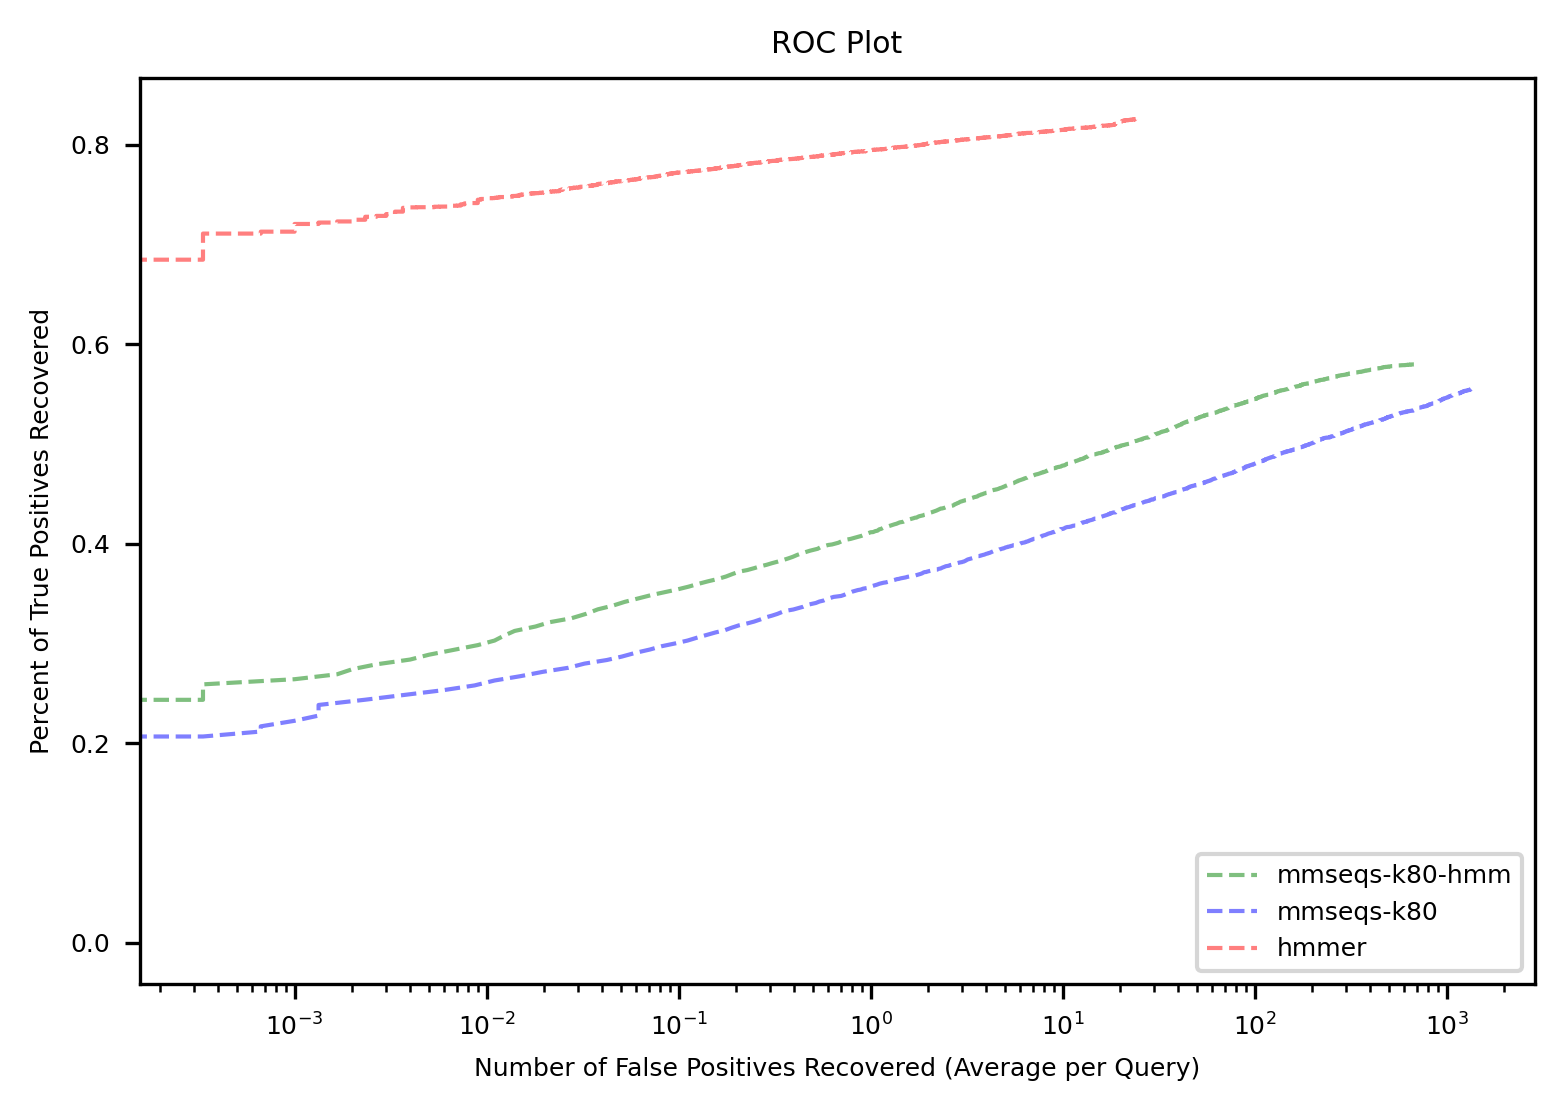

In [73]:
my_data = [ mmseqs_k80_hmm_data, mmseqs_k80_data, hmmer_data ]
colors  = [ 'green', 'blue', 'red' ]
labels  = [ 'mmseqs-k80-hmm', 'mmseqs-k80', 'hmmer' ]
linewidths = [ 1, 1, 1 ]

for x in range(len(my_data)):
    plt.plot( my_data[x]["roc_x"], my_data[x]["roc_y"], color=colors[x], label=labels[x], linestyle="--", marker=None, linewidth=linewidths[x], alpha=0.5 )

plt.title('ROC Plot')
plt.legend(loc='lower right')
plt.ylabel('Percent of True Positives Recovered')
plt.xlabel('Number of False Positives Recovered (Average per Query)')
plt.xscale('log')
plt.savefig("visuals/mmseqs-hmmer-fbpruner-roc-plot.jpg")
plt.show()

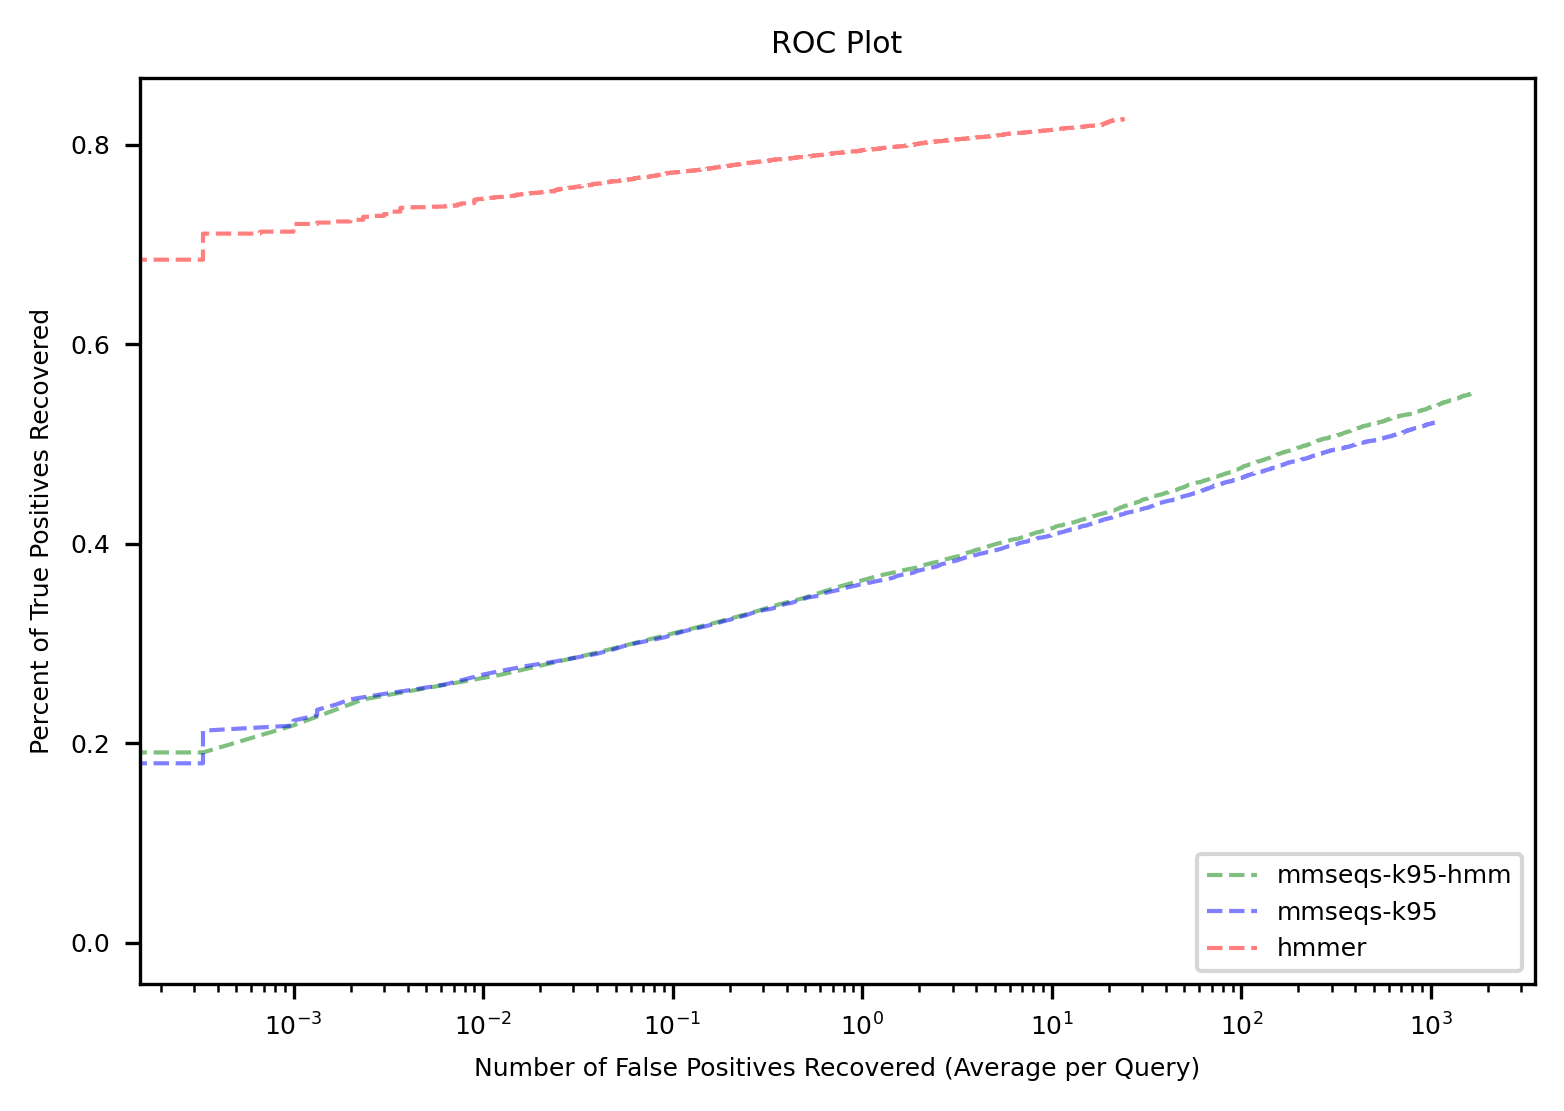

In [74]:
my_data = [ mmseqs_k95_hmm_data, mmseqs_k95_data, hmmer_data ]
colors  = [ 'green', 'blue', 'red' ]
labels  = [ 'mmseqs-k95-hmm', 'mmseqs-k95', 'hmmer' ]
linewidths = [ 1, 1, 1 ]

for x in range(len(my_data)):
    plt.plot( my_data[x]["roc_x"], my_data[x]["roc_y"], color=colors[x], label=labels[x], linestyle="--", marker=None, linewidth=linewidths[x], alpha=0.5 )

plt.title('ROC Plot')
plt.legend(loc='lower right')
plt.ylabel('Percent of True Positives Recovered')
plt.xlabel('Number of False Positives Recovered (Average per Query)')
plt.xscale('log')
plt.savefig("visuals/mmseqs-hmmer-fbpruner-roc-plot.jpg")
plt.show()

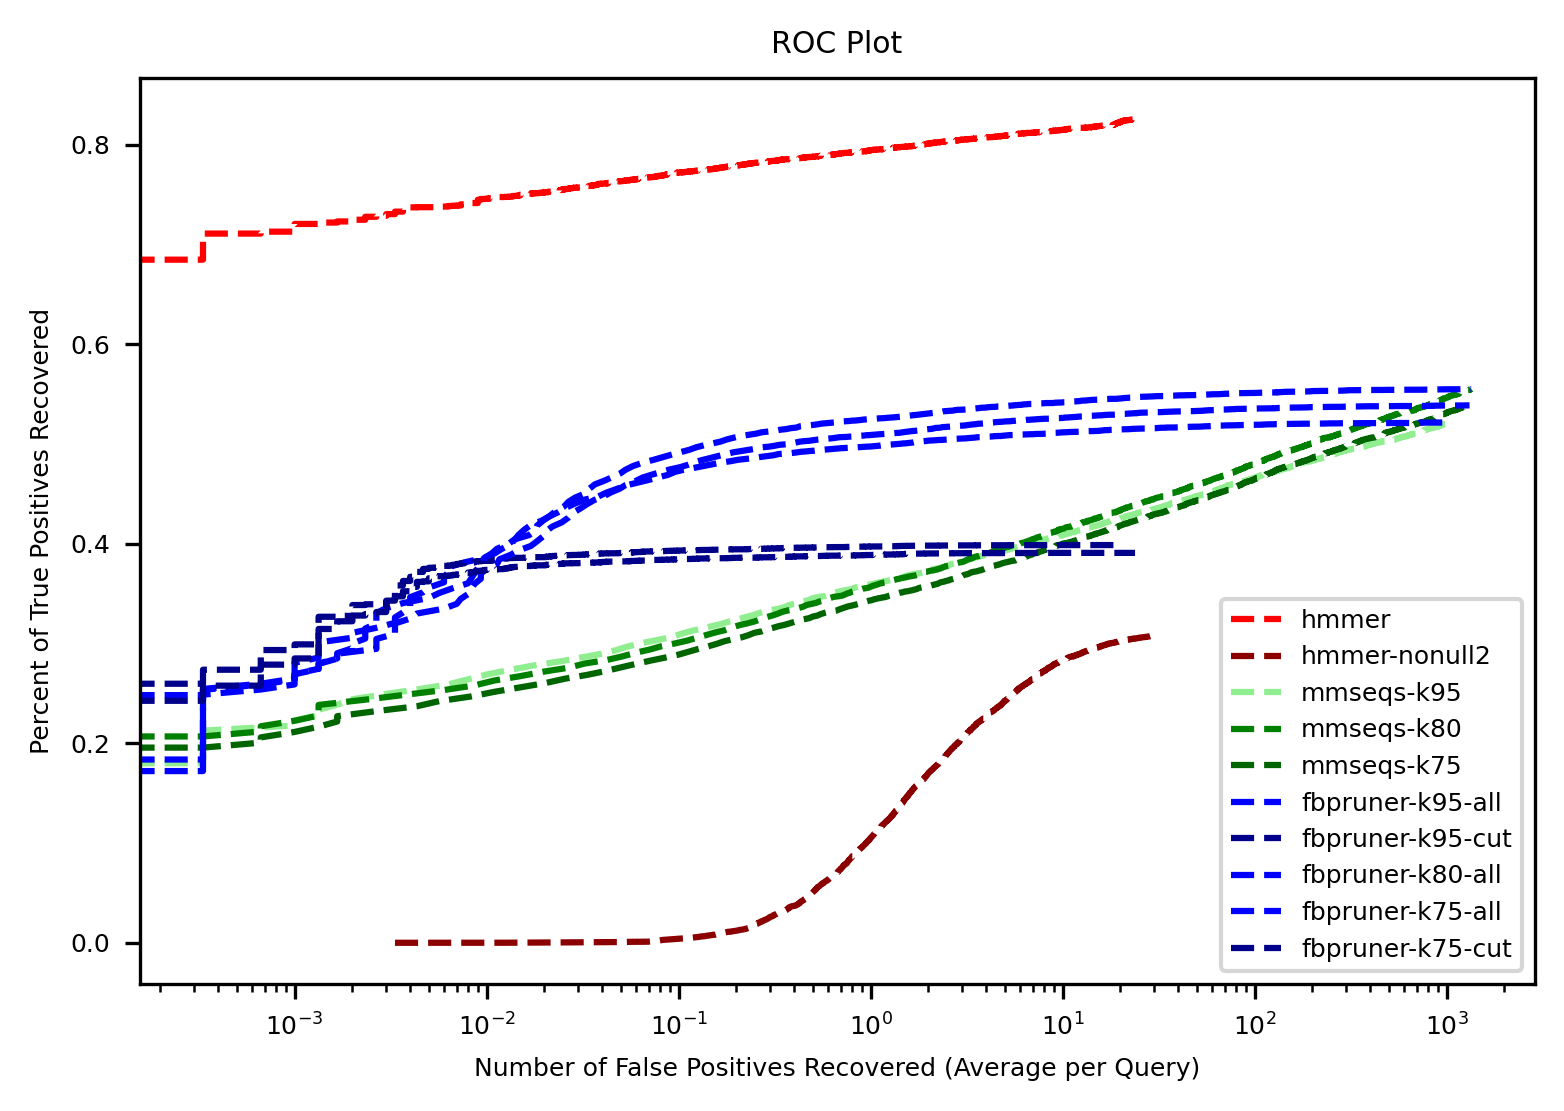

In [75]:
my_data = [ hmmer_data, hmmer_nonull_data, mmseqs_k95_data, mmseqs_k80_data, mmseqs_k75_data,  fbpruner_k95_all_data, fbpruner_k95_cut_data, fbpruner_k80_all_data, fbpruner_k75_all_data, fbpruner_k75_cut_data ]
colors  = [ 'red', 'darkred', 'lightgreen', 'green', 'darkgreen', 'blue', 'darkblue', 'blue', 'blue', 'darkblue' ]
labels  = [ 'hmmer', 'hmmer-nonull2', 'mmseqs-k95', 'mmseqs-k80', 'mmseqs-k75', 'fbpruner-k95-all', 'fbpruner-k95-cut', 'fbpruner-k80-all', 'fbpruner-k75-all', 'fbpruner-k75-cut' ]

for x in range(len(my_data)):
    plt.plot( my_data[x]["roc_x"], my_data[x]["roc_y"], color=colors[x], label=labels[x], linestyle="--", marker=None )

plt.title('ROC Plot')
plt.legend(loc='lower right')
plt.ylabel('Percent of True Positives Recovered')
plt.xlabel('Number of False Positives Recovered (Average per Query)')
plt.xscale('log')
plt.savefig("visuals/mmseqs-hmmer-fbpruner-roc-plot.jpg")
plt.show()

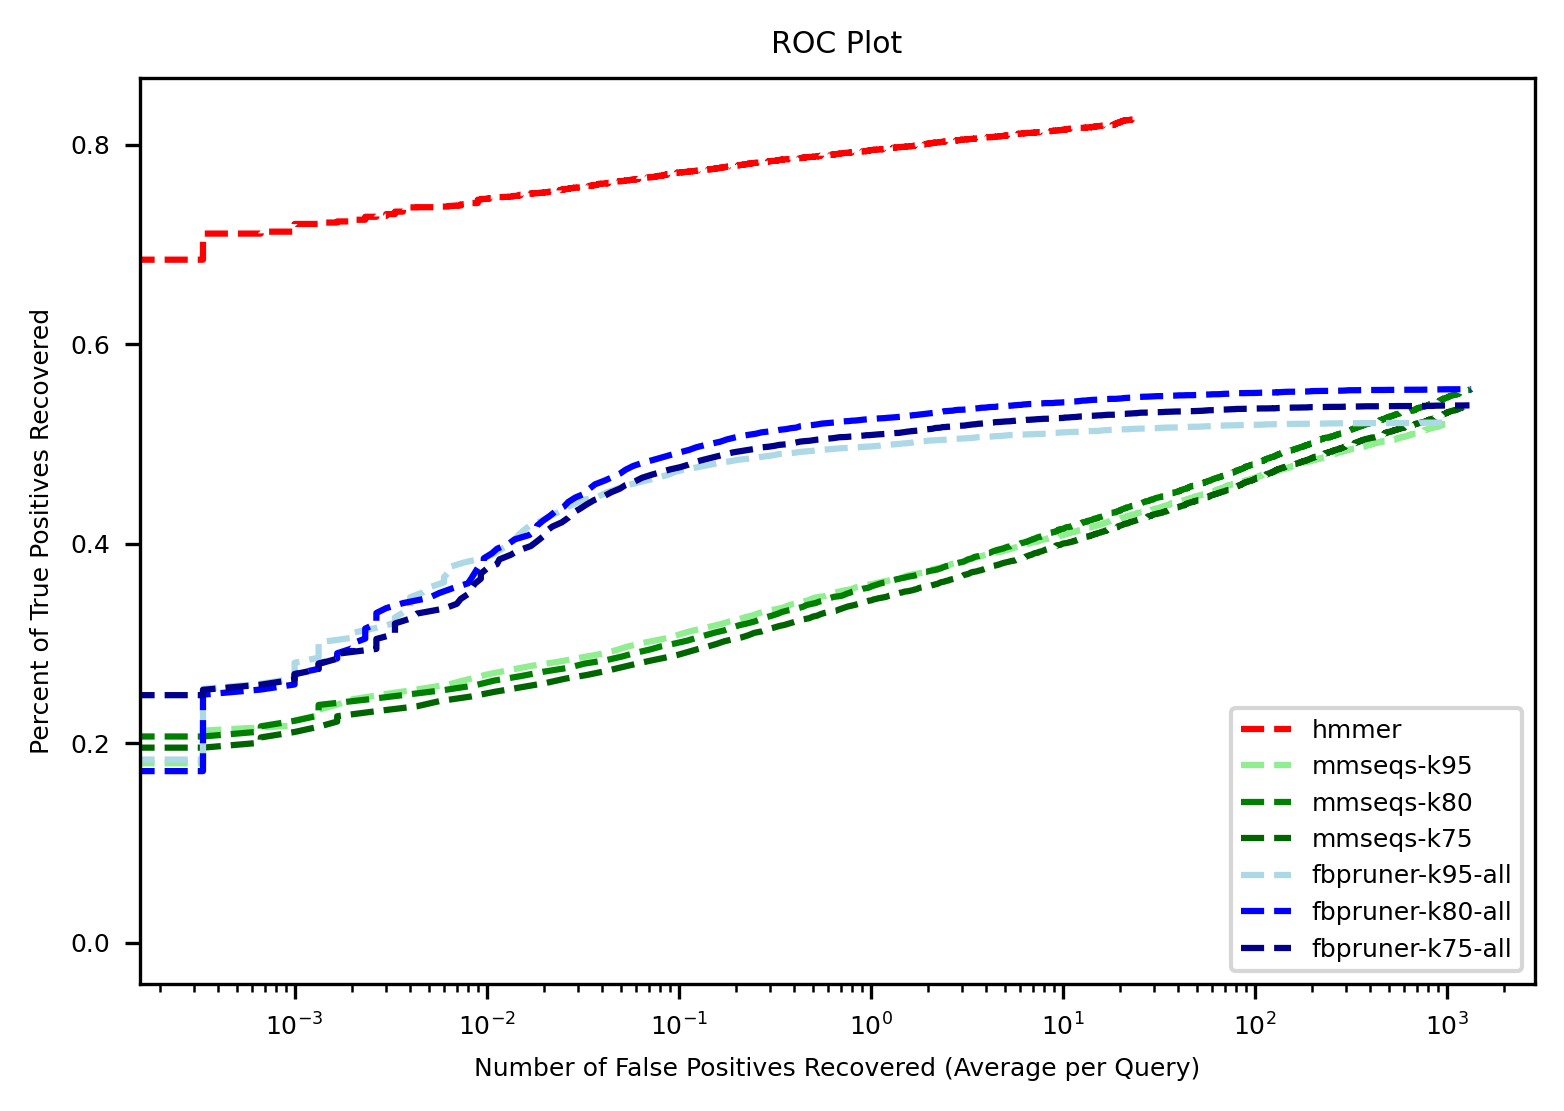

In [76]:
my_data = [ hmmer_data, mmseqs_k95_data, mmseqs_k80_data, mmseqs_k75_data,  fbpruner_k95_all_data, fbpruner_k80_all_data, fbpruner_k75_all_data ]
colors  = [ 'red', 'lightgreen', 'green', 'darkgreen', 'lightblue', 'blue', 'darkblue' ]
labels  = [ 'hmmer', 'mmseqs-k95', 'mmseqs-k80', 'mmseqs-k75', 'fbpruner-k95-all', 'fbpruner-k80-all', 'fbpruner-k75-all' ]

for x in range(len(my_data)):
    plt.plot( my_data[x]["roc_x"], my_data[x]["roc_y"], color=colors[x], label=labels[x], linestyle="--", marker=None )

plt.title('ROC Plot')
plt.legend(loc='lower right')
plt.ylabel('Percent of True Positives Recovered')
plt.xlabel('Number of False Positives Recovered (Average per Query)')
plt.xscale('log')
plt.savefig("visuals/mmseqs-hmmer-fbpruner-roc-plot.jpg")
plt.show()

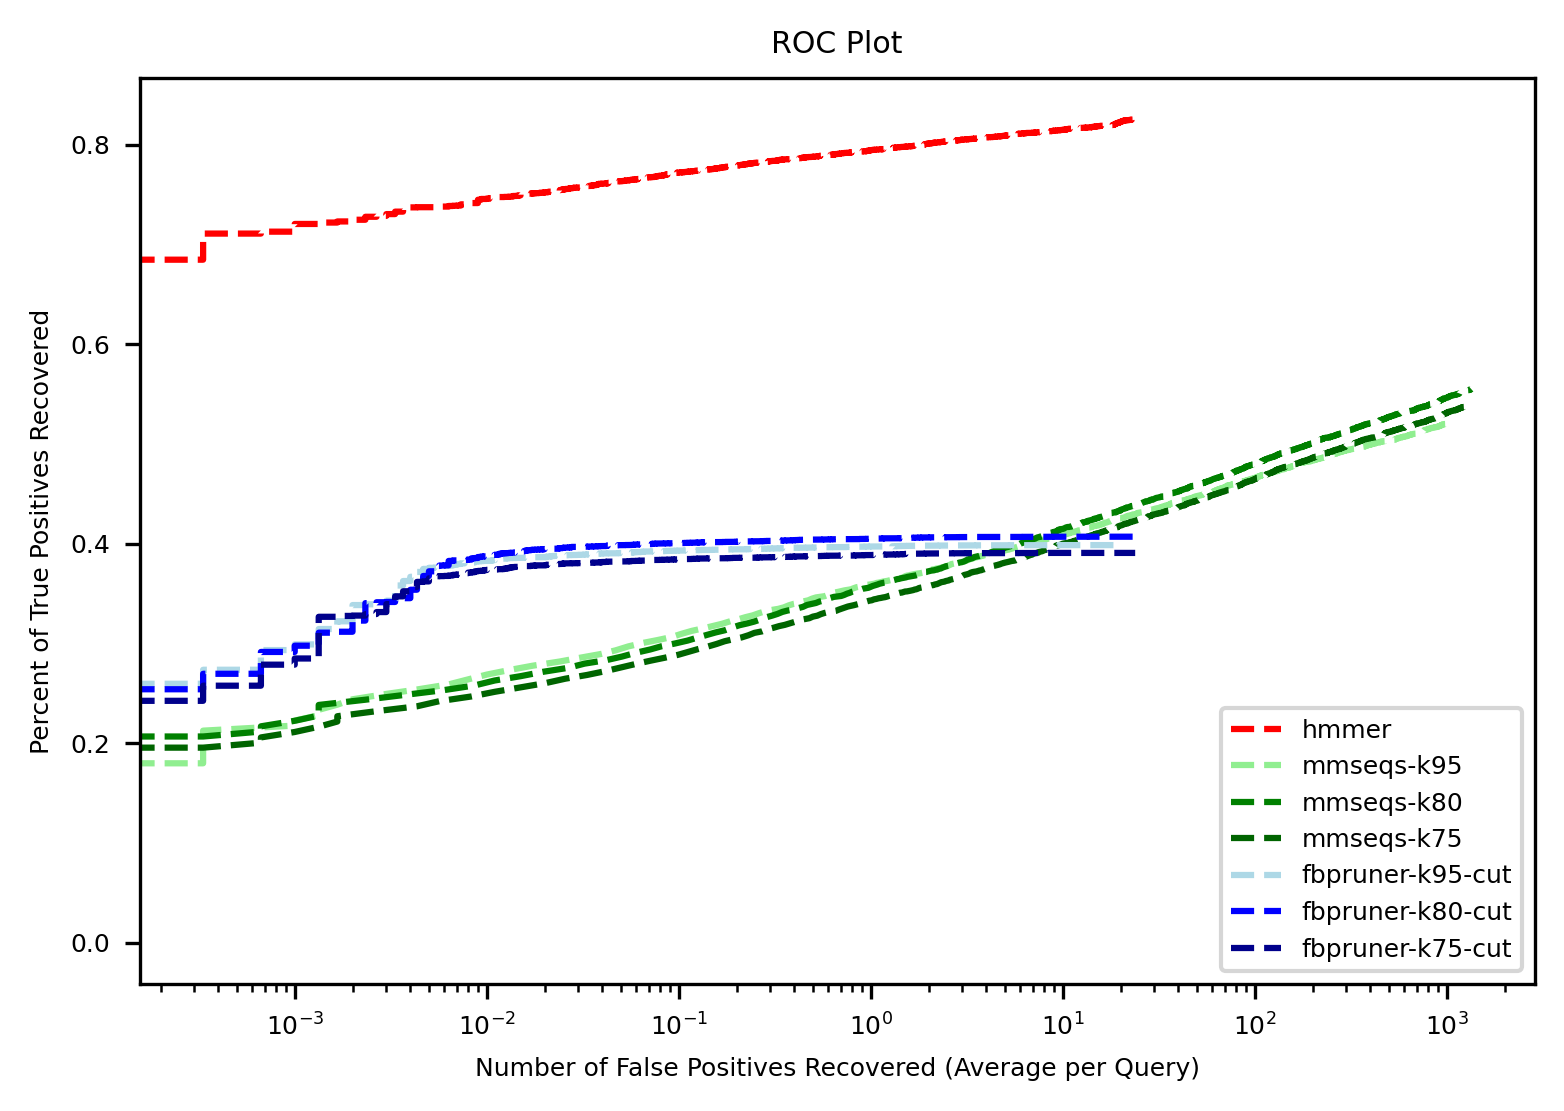

In [171]:
my_data = [ hmmer_data, mmseqs_k95_data, mmseqs_k80_data, mmseqs_k75_data,  fbpruner_k95_cut_data, fbpruner_k80_cut_data, fbpruner_k75_cut_data ]
colors  = [ 'red', 'lightgreen', 'green', 'darkgreen', 'lightblue', 'blue', 'darkblue' ]
labels  = [ 'hmmer', 'mmseqs-k95', 'mmseqs-k80', 'mmseqs-k75', 'fbpruner-k95-cut', 'fbpruner-k80-cut', 'fbpruner-k75-cut' ]

for x in range(len(my_data)):
    plt.plot( my_data[x]["roc_x"], my_data[x]["roc_y"], color=colors[x], label=labels[x], linestyle="--", marker=None )

plt.title('ROC Plot')
plt.legend(loc='lower right')
plt.ylabel('Percent of True Positives Recovered')
plt.xlabel('Number of False Positives Recovered (Average per Query)')
plt.xscale('log')
plt.savefig("visuals/mmseqs-hmmer-fbpruner-roc-plot.jpg")
plt.show()

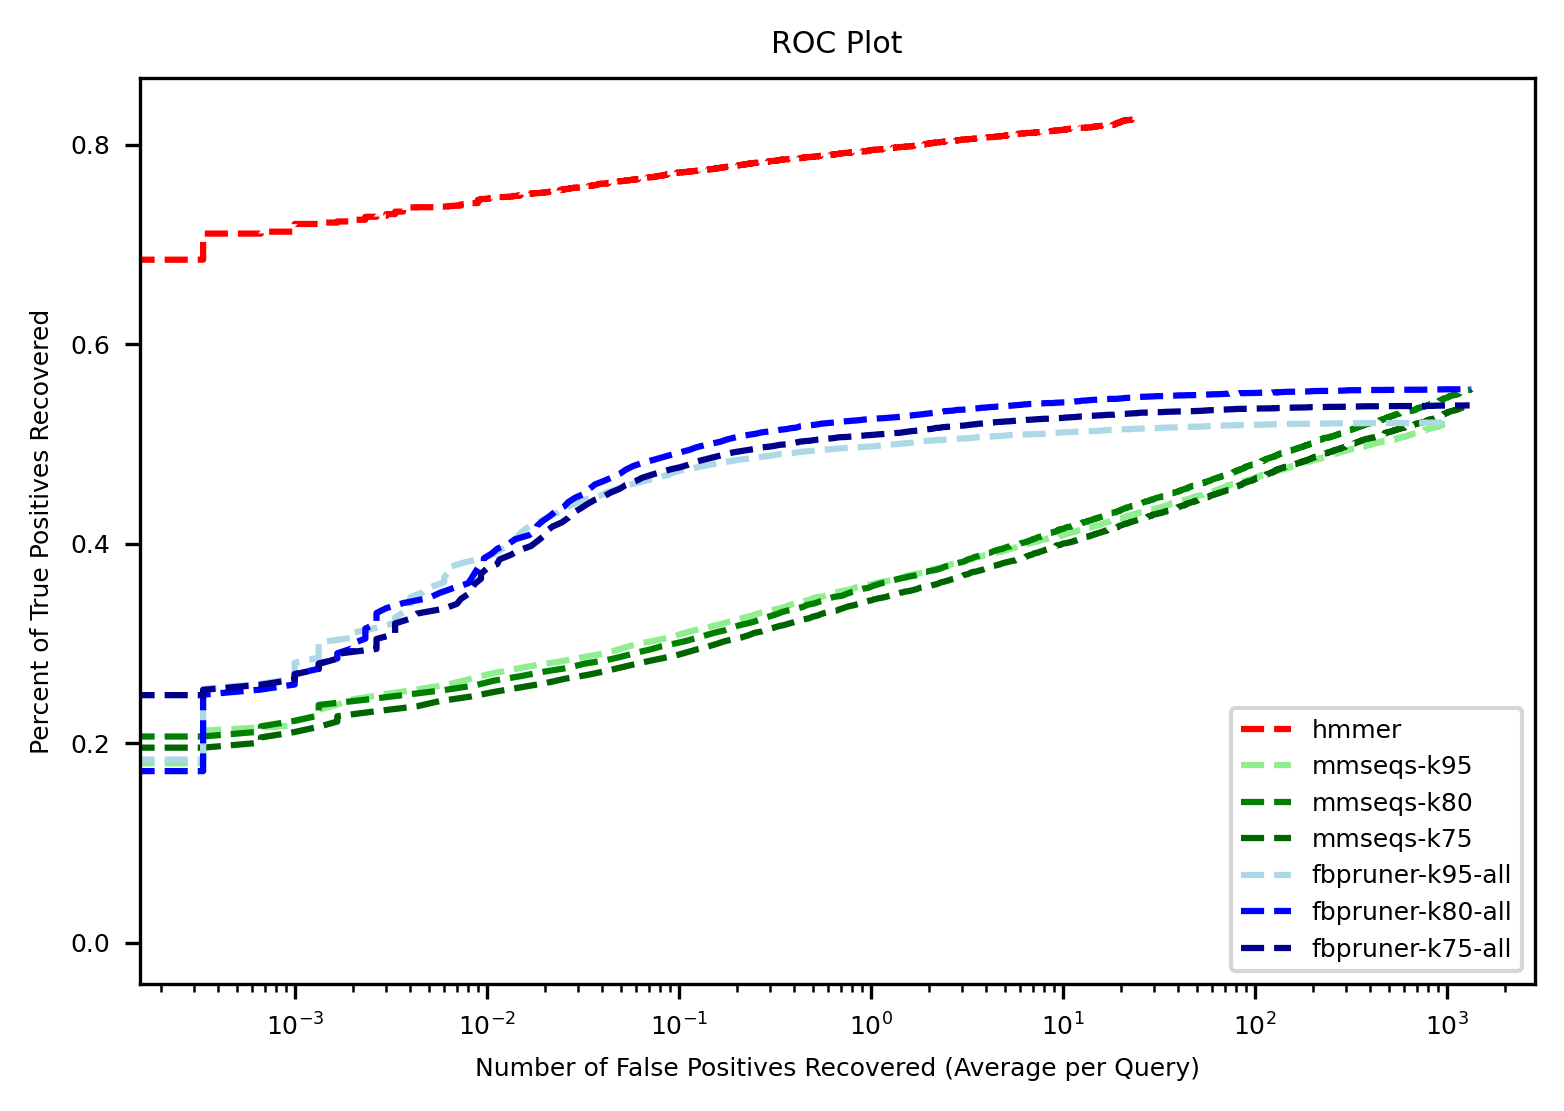

In [201]:
my_data = [ hmmer_data, mmseqs_k95_data, mmseqs_k80_data, mmseqs_k75_data,  fbpruner_k95_all_data, fbpruner_k80_all_data, fbpruner_k75_all_data ]
colors  = [ 'red', 'lightgreen', 'green', 'darkgreen', 'lightblue', 'blue', 'darkblue' ]
labels  = [ 'hmmer', 'mmseqs-k95', 'mmseqs-k80', 'mmseqs-k75', 'fbpruner-k95-all', 'fbpruner-k80-all', 'fbpruner-k75-all' ]

for x in range(len(my_data)):
    plt.plot( my_data[x]["roc_x"], my_data[x]["roc_y"], color=colors[x], label=labels[x], linestyle="--", marker=None )

plt.title('ROC Plot')
plt.legend(loc='lower right')
plt.ylabel('Percent of True Positives Recovered')
plt.xlabel('Number of False Positives Recovered (Average per Query)')
plt.xscale('log')
plt.savefig("visuals/mmseqs-hmmer-fbpruner-roc-plot.jpg")
plt.show()

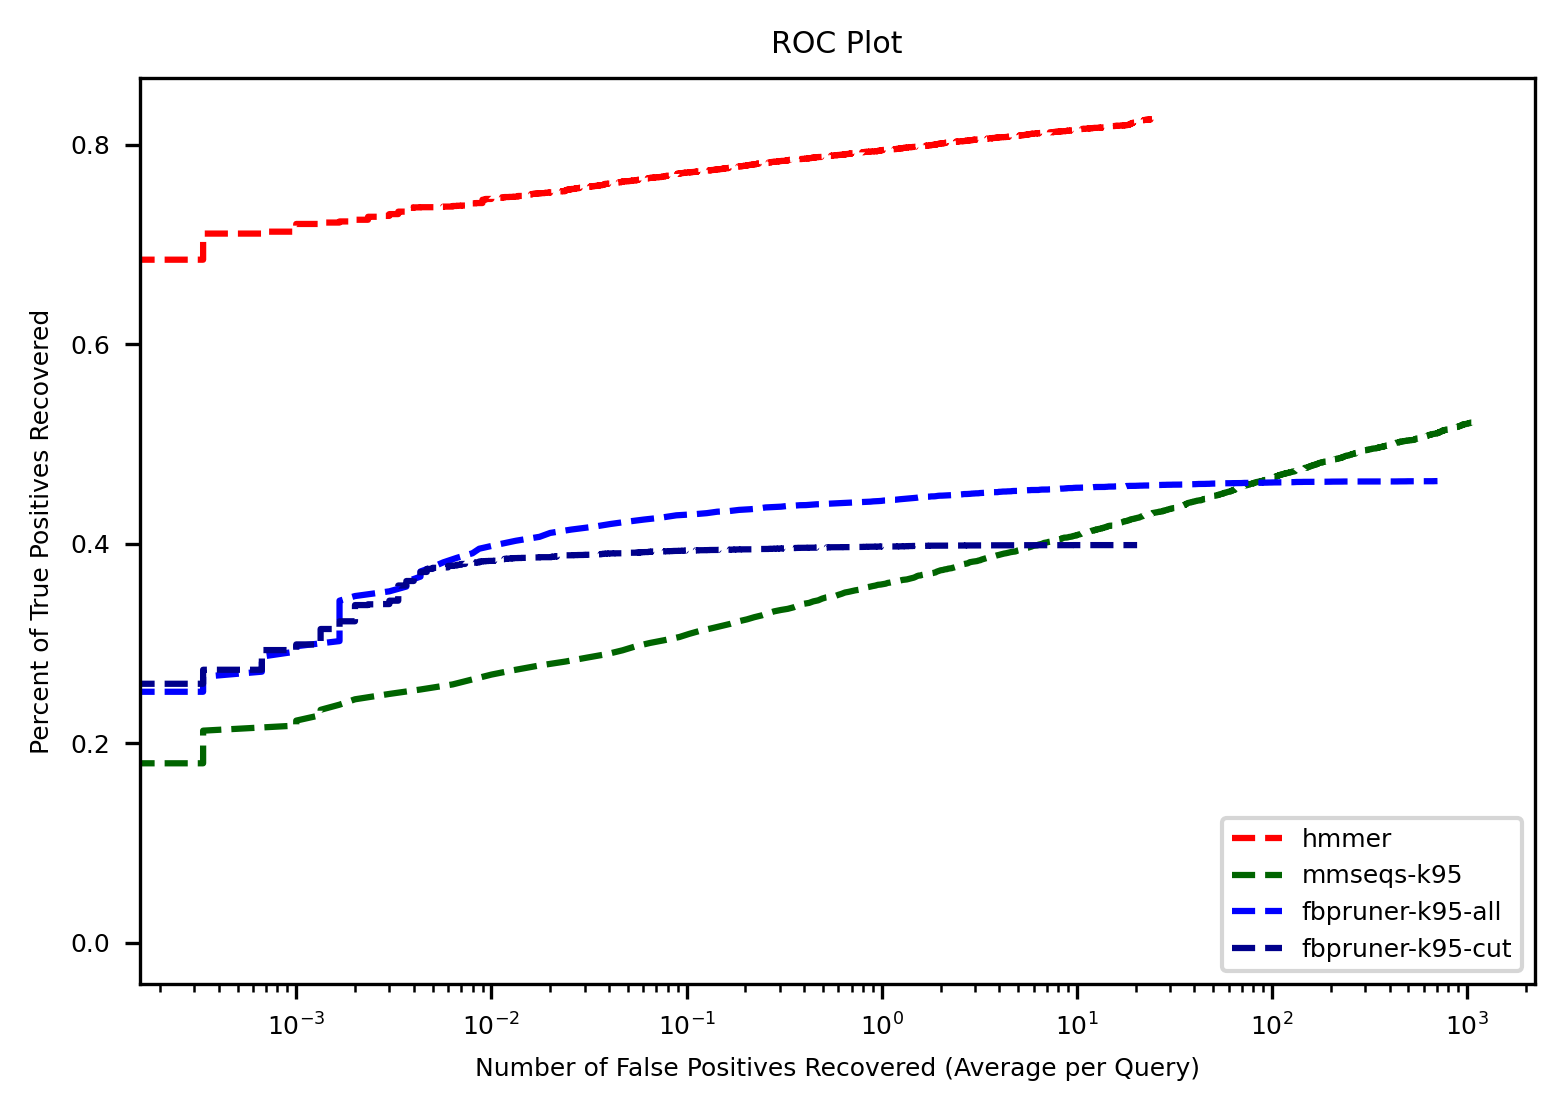

In [172]:
my_data = [ hmmer_data, mmseqs_k95_data, fbpruner_k95_all_data, fbpruner_k95_cut_data ]
colors  = [ 'red', 'darkgreen', 'blue', 'darkblue' ]
labels  = [ 'hmmer', 'mmseqs-k95', 'fbpruner-k95-all', 'fbpruner-k95-cut' ]

for x in range(len(my_data)):
    plt.plot( my_data[x]["roc_x"], my_data[x]["roc_y"], color=colors[x], label=labels[x], linestyle="--", marker=None )

plt.title('ROC Plot')
plt.legend(loc='lower right')
plt.ylabel('Percent of True Positives Recovered')
plt.xlabel('Number of False Positives Recovered (Average per Query)')
plt.xscale('log')
plt.savefig("visuals/mmseqs-hmmer-fbpruner-roc-plot.jpg")
plt.show()

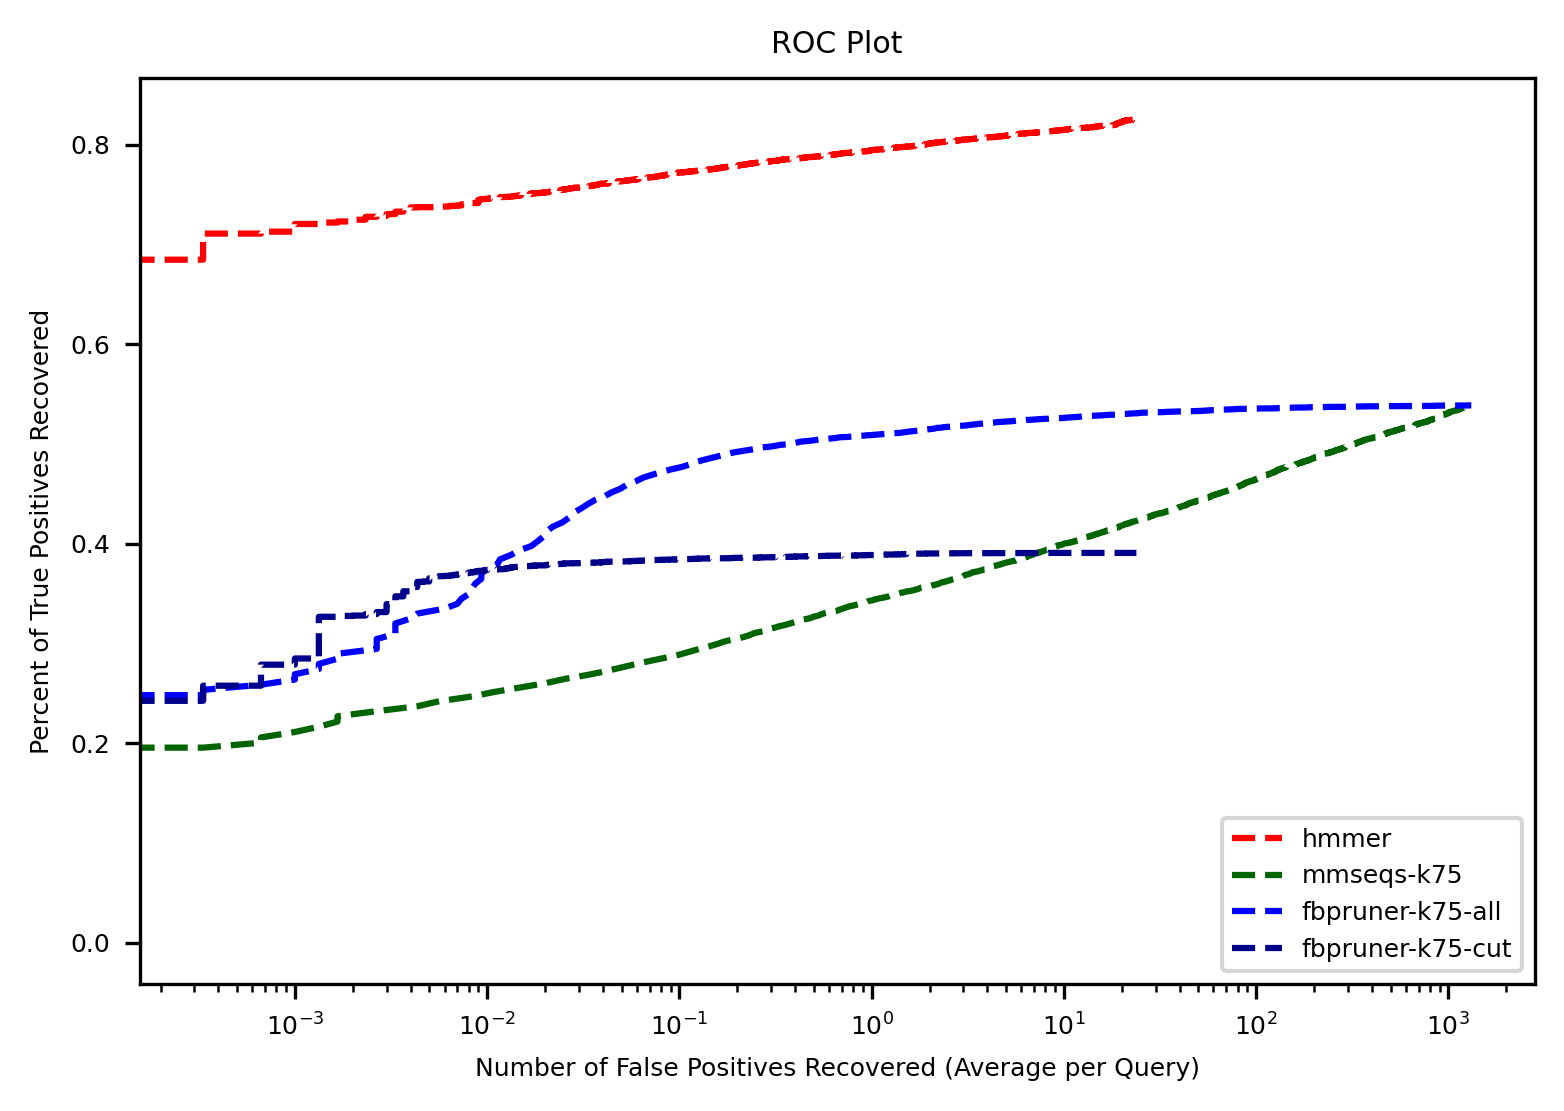

In [178]:
my_data = [ hmmer_data, mmseqs_k75_data, fbpruner_k75_all_data, fbpruner_k75_cut_data ]
colors  = [ 'red', 'darkgreen', 'blue', 'darkblue' ]
labels  = [ 'hmmer', 'mmseqs-k75', 'fbpruner-k75-all', 'fbpruner-k75-cut' ]

for x in range(len(my_data)):
    plt.plot( my_data[x]["roc_x"], my_data[x]["roc_y"], color=colors[x], label=labels[x], linestyle="--", marker=None )

plt.title('ROC Plot')
plt.legend(loc='lower right')
plt.ylabel('Percent of True Positives Recovered')
plt.xlabel('Number of False Positives Recovered (Average per Query)')
plt.xscale('log')
plt.savefig("visuals/mmseqs-hmmer-fbpruner-roc-plot.jpg")
plt.show()

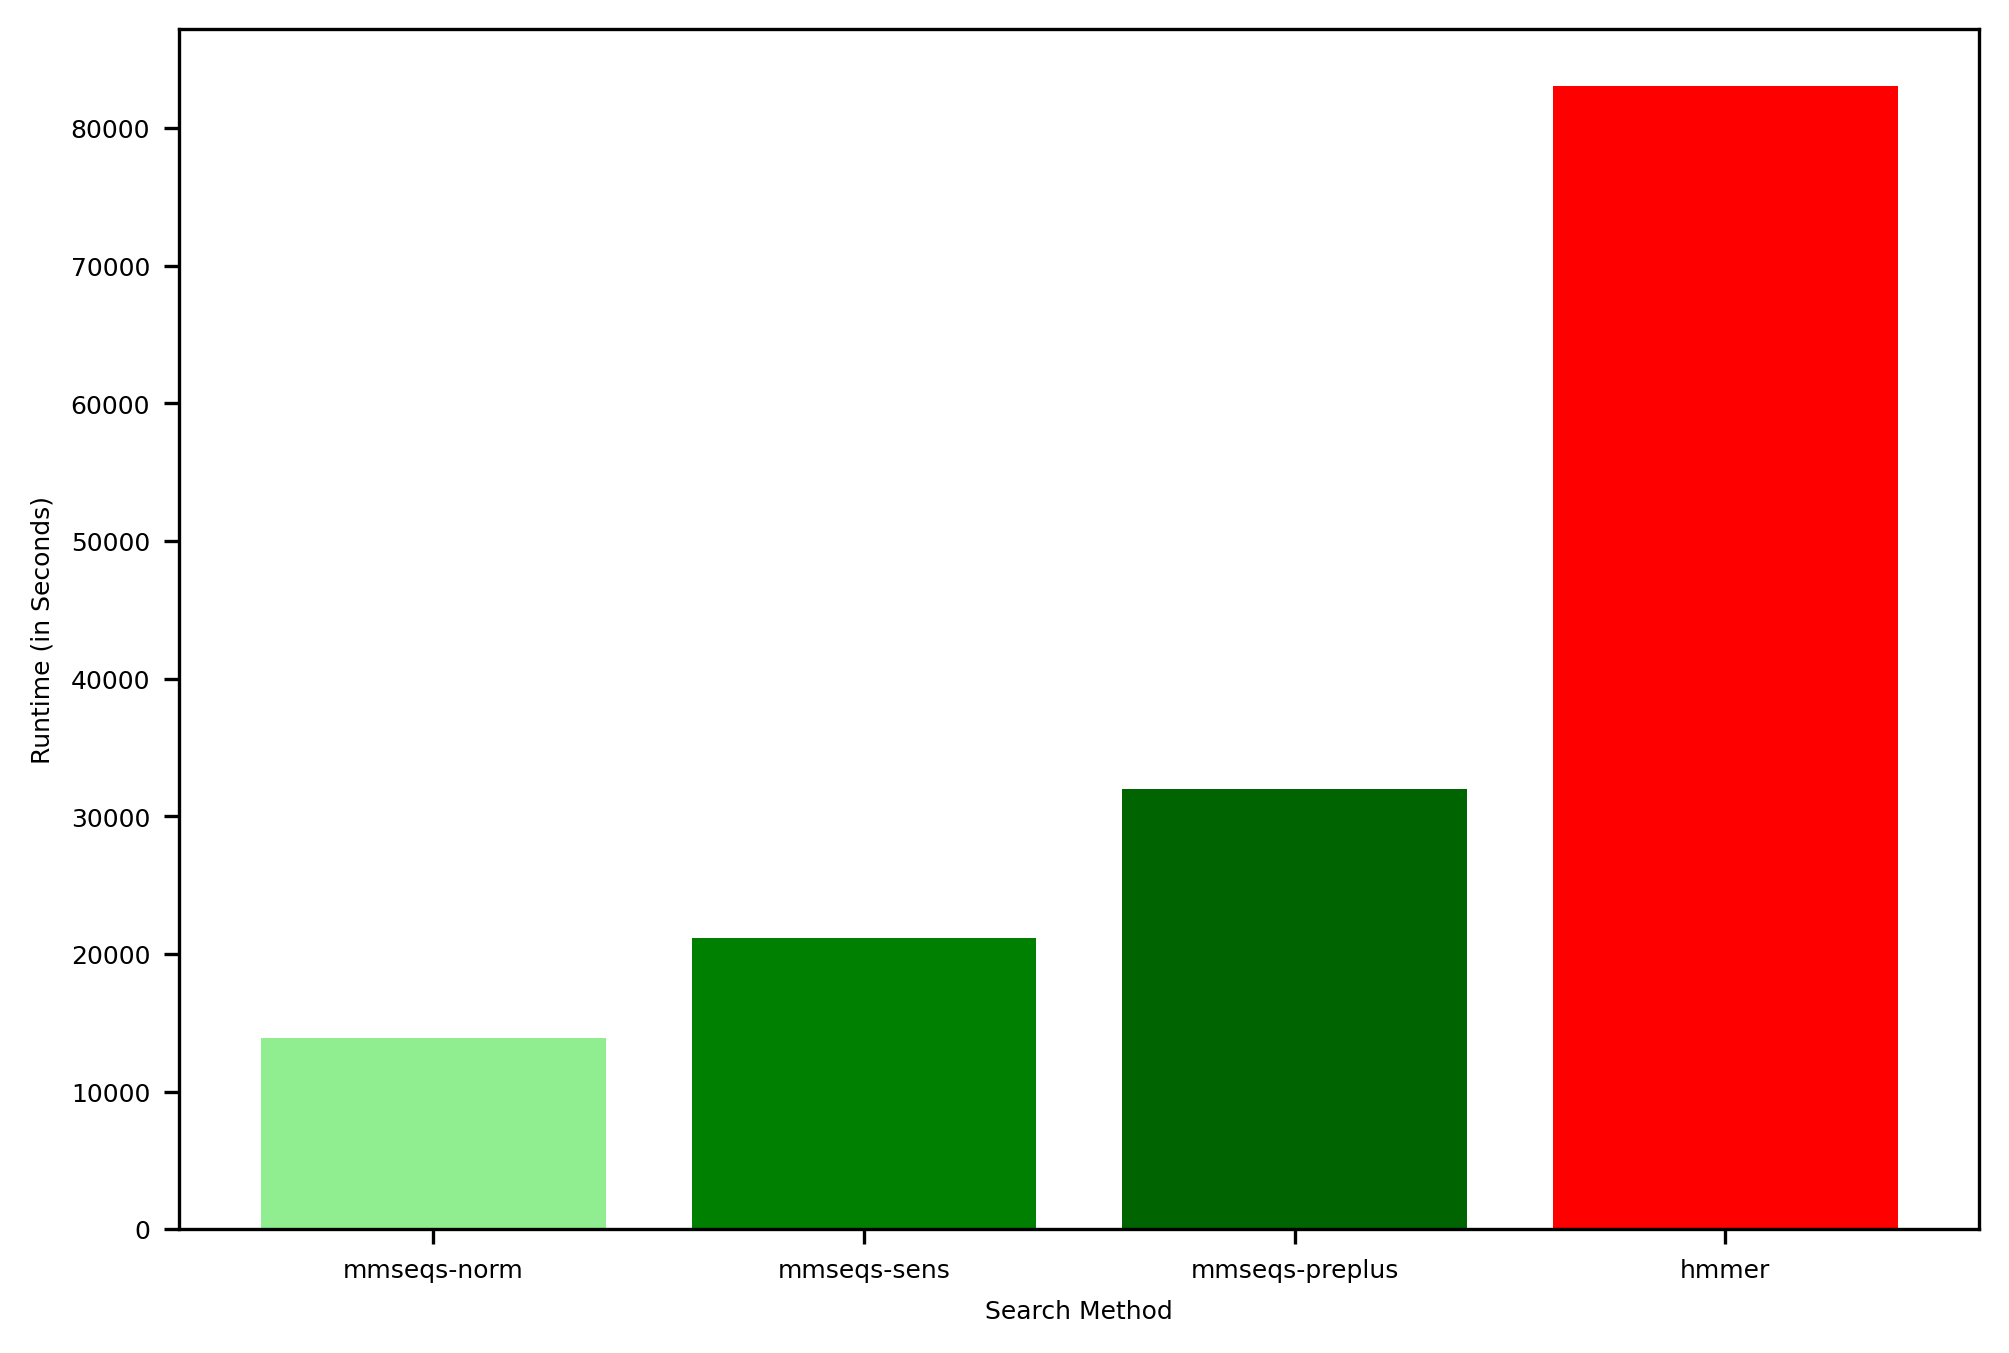

In [173]:
# compare mmseqs sensitivity runtimes
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
xlabels = ['mmseqs-norm', 'mmseqs-sens', 'mmseqs-preplus', 'hmmer']
colors= ['lightgreen', 'green', 'darkgreen', 'red']
scalar = mmseqs_times['k95']
data = [ mmseqs_times['k95'], mmseqs_times['k80'], mmseqs_times['k75'], hmmer_times['total'] ]
ax.bar(xlabels, data, color=colors)
plt.ylabel('Runtime (in Seconds)')
plt.xlabel('Search Method')
plt.show()

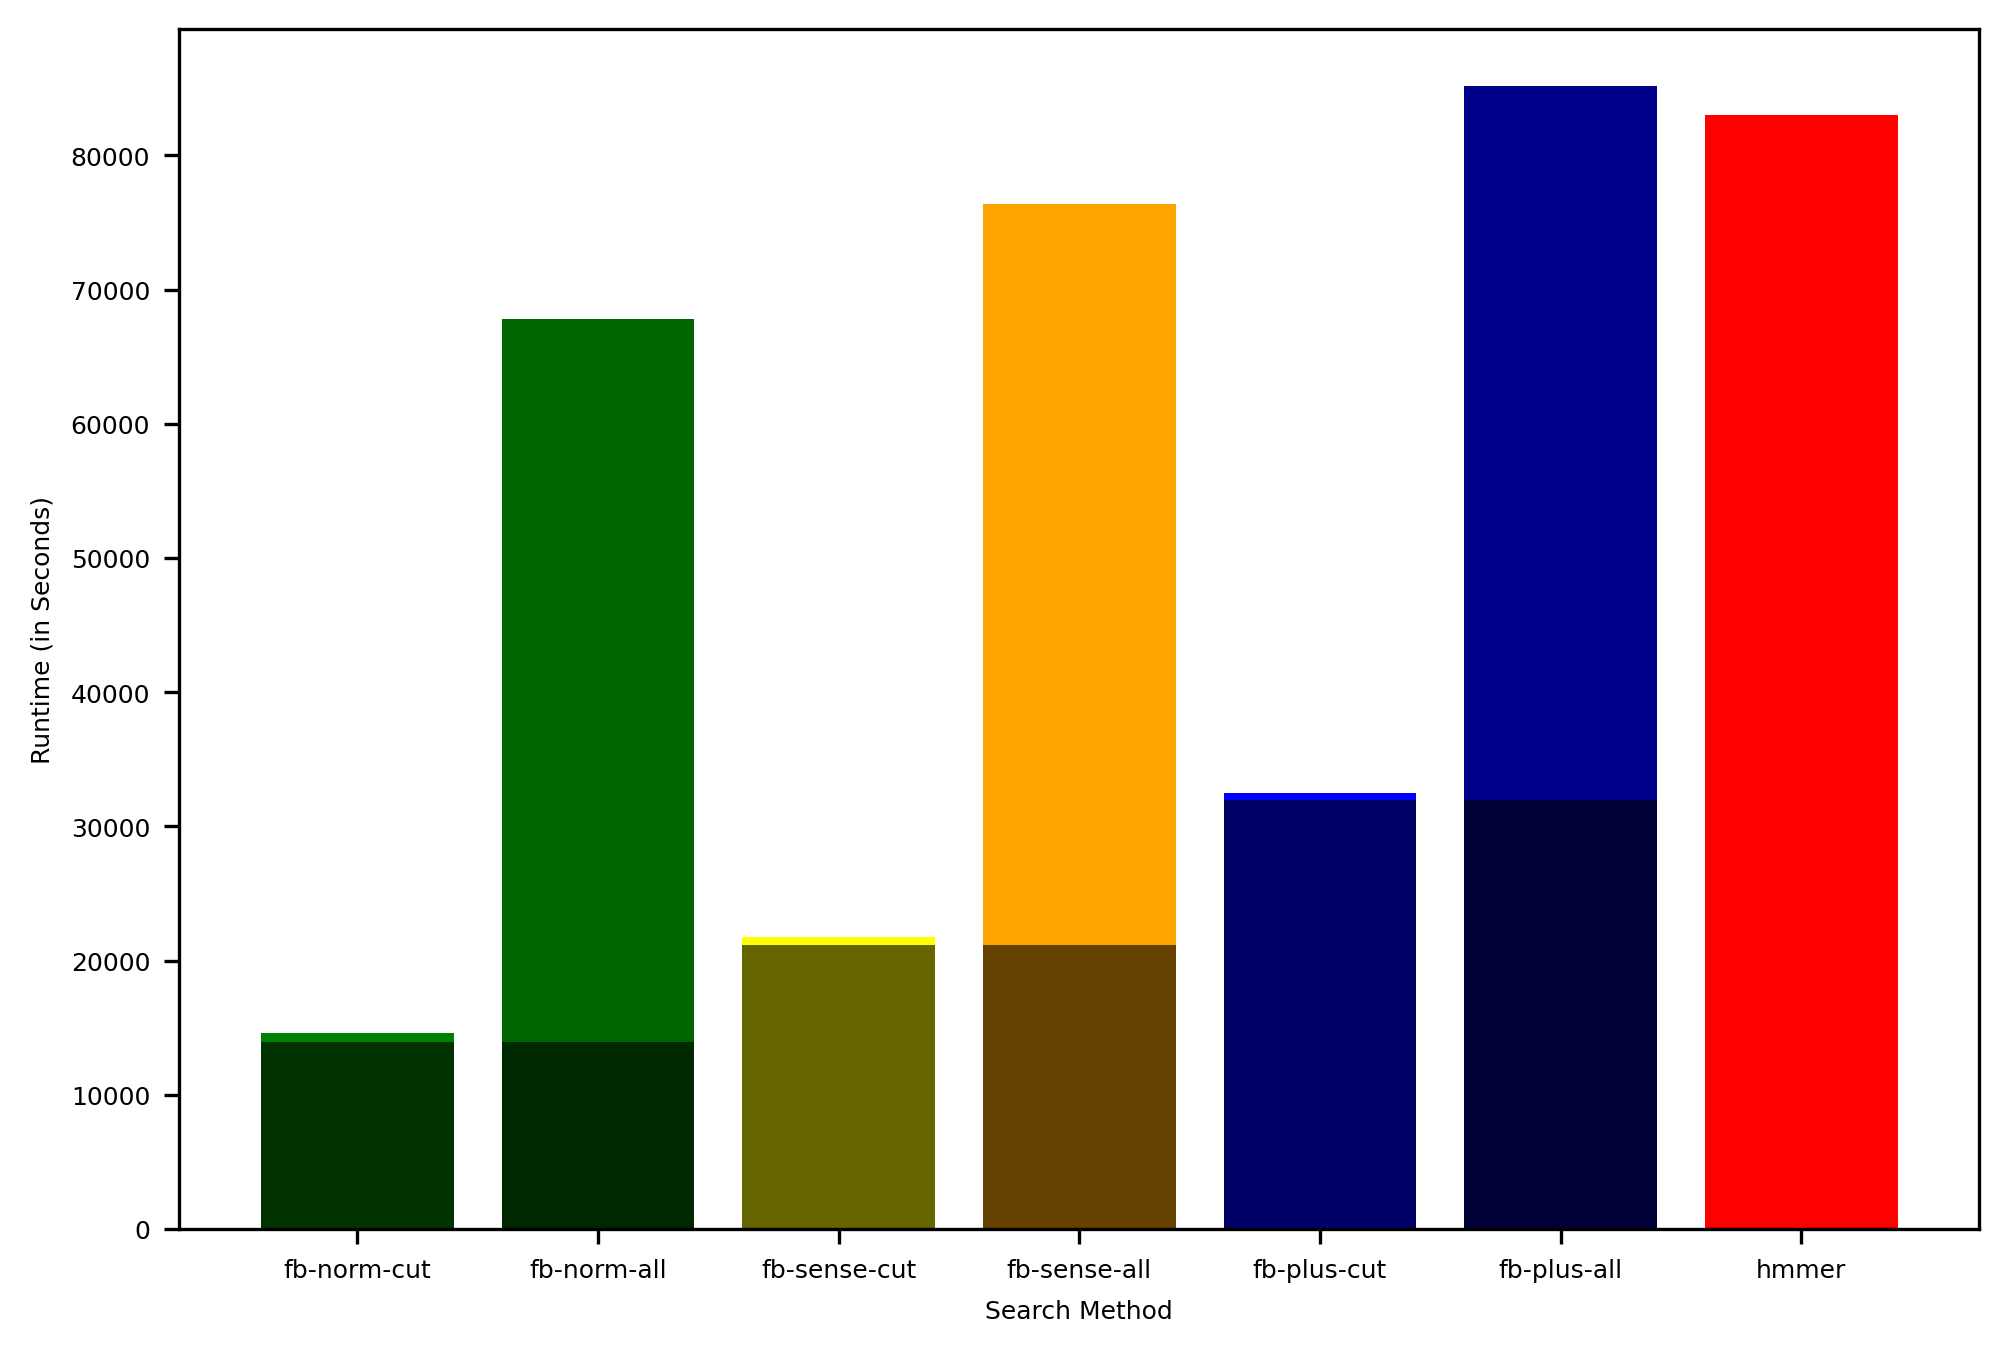

In [177]:
# compare mmseqs sensitivity runtimes
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
xlabels = ['fb-norm-cut', 'fb-norm-all', 'fb-sense-cut', 'fb-sense-all', 'fb-plus-cut', 'fb-plus-all', 'hmmer']
colors= ['green', 'darkgreen', 'yellow', 'orange', 'blue', 'darkblue', 'red']
scalar = mmseqs_times['k95']
data_top = [ fbpruner_times['k95-cut'], fbpruner_times['k95-all'], fbpruner_times['k80-cut'], fbpruner_times['k80-all'], fbpruner_times['k75-cut'], fbpruner_times['k75-all'], hmmer_times['total'] ]
data_btm = [ mmseqs_times['k95'], mmseqs_times['k95'],  mmseqs_times['k80'], mmseqs_times['k80'], mmseqs_times['k75'], mmseqs_times['k75'], 0 ]
ax.bar(xlabels, data_top, color=colors)
ax.bar(xlabels, data_btm, color='black', alpha=0.6 )
plt.ylabel('Runtime (in Seconds)')
plt.xlabel('Search Method')
plt.show()